In [1]:
#csv 불러오기
import pandas as pd
csv_te = pd.read_csv("csv_file_change.csv")
csv_te

,Unnamed: 0,id,file,label
0,0,0,1.wav,0
1,1,1,2.wav,0
2,2,2,3.wav,0
3,3,3,4.wav,0
4,4,4,5.wav,0
...,...,...,...,...
50100,50100,50100,50101.wav,1
50101,50101,50101,50102.wav,1
50102,50102,50102,50103.wav,1
50103,50103,50103,50104.wav,1


In [2]:
#필요 열만 취함
df = csv_te.drop(csv_te.columns[[0]], axis=1)
df

,id,file,label
0,0,1.wav,0
1,1,2.wav,0
2,2,3.wav,0
3,3,4.wav,0
4,4,5.wav,0
...,...,...,...
50100,50100,50101.wav,1
50101,50101,50102.wav,1
50102,50102,50103.wav,1
50103,50103,50104.wav,1


In [3]:
#섞어서 난수 생성
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [4]:
df_shuffled

,id,file,label
0,7554,7555.wav,0
1,31716,31717.wav,0
2,8612,8613.wav,0
3,9266,9267.wav,0
4,31458,31459.wav,0
...,...,...,...
50100,29478,29479.wav,0
50101,20318,20319.wav,0
50102,46641,46642.wav,0
50103,32036,32037.wav,0


In [5]:
print(df_shuffled[df_shuffled.file == '1.wav'])

       id   file  label
19352   0  1.wav      0


In [7]:
#data 들어있는 dataset 만들기, 
import librosa
from tqdm import tqdm
import os

import tensorflow as tf

#이건 gpu 실행 코드, cpu 환경은 삭제해도 좋음
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

# 이게 train dataset 작성코드
def train_dataset(x):#나눌 크기인 x초 입력
    folder = "D:/wav_data/nomal/21/"
    dataset = []
    for file_name in tqdm(os.listdir(folder)):
        if 'wav' in file_name:
            abs_file_path = os.path.join(folder,file_name)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = (df_shuffled[df_shuffled.file == file_name]['label']).values[0]
            #data를 x초로 나누어서 작성해야 함
            for i in range((len(data)//(sr*x))+1):
                dataset.append([data[int(sr*x)*i:int(sr*x)*(i+1)], class_label])
    print("Dataset 생성완료")
    return pd.DataFrame(dataset, columns=['data','label'])

def anomal_dataset(x):#나눌 크기인 x초 입력
    folder = "D:/wav_data/test/"
    dataset = []
    for file_name in tqdm(os.listdir(folder)):
        if 'wav' in file_name:
            abs_file_path = os.path.join(folder,file_name)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = (df_shuffled[df_shuffled.file == file_name]['label']).values[0]
           #data를 x초로 나누어서 작성해야 함
            for i in range((len(data)//(sr*x))+1):
                dataset.append([data[int(sr*x)*i:int(sr*x)*(i+1)], class_label])
    print("Dataset 생성완료")
    return pd.DataFrame(dataset, columns=['data','label'])

train_wav = train_dataset(5)
abnomal_wav = anomal_dataset(5)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:16<00:00,  2.55it/s]


Dataset 생성완료


100%|████████████████████████████████████████████████████████████████████████████████| 122/122 [00:47<00:00,  2.57it/s]

Dataset 생성완료


In [8]:
#train data 확인
print(train_wav.shape)
train_wav.head()

(23232, 2)


,data,label
0,"[-0.0004551637, -0.00020669651, 9.142293e-05, ...",0
1,"[-0.013211237, -0.029641103, -0.037866898, -0....",0
2,"[0.0011128078, 0.0012925317, 0.0013294101, 0.0...",0
3,"[0.00719568, 0.009941348, 0.012935356, 0.01558...",0
4,"[-0.045845773, -0.04024237, -0.032096397, -0.0...",0


In [9]:
#abnomal_wav.head()

In [10]:
#배열 확인
for i in range(len(train_wav)):
    print(len(train_wav['data'][i]))

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
6972
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
15718
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
34248
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
15754
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
13584
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
50254
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
15668
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
54998
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
17800
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
16906
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
76532
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
50736
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
56514
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
26432
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
52472
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
68850
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
48000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
29702
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
62412
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
46658
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
54286
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
10864
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
44978
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
76176
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
38506
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
26608
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
3780
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
75722
80000
80000
80000
80000
80000
80000
80000

In [11]:
#mel-spectrogram 처리
import numpy as np
mel_spec = []
for i in range(len(train_wav['data'])):
    mel_spec.append(librosa.feature.melspectrogram(y=np.array(train_wav['data'][i]), sr=16000, hop_length=160, n_mels=40))
mel_spec[0]

C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1846
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=440
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1394
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=700
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=380
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1096
  ret

array([[1.1574598e-04, 2.0326579e-04, 3.0718744e-04, ..., 9.8342504e-03,
        4.1323649e-03, 1.8764486e-03],
       [1.2223418e-04, 1.8419890e-04, 2.3479860e-04, ..., 1.9483654e-02,
        8.0262832e-03, 3.0634464e-03],
       [1.3581374e-04, 1.6762970e-04, 1.7826392e-04, ..., 8.9327469e-03,
        5.5009536e-03, 3.1055931e-03],
       ...,
       [9.5810151e-09, 8.4751095e-09, 5.7843912e-09, ..., 5.3530738e-07,
        7.8163504e-07, 8.8096527e-07],
       [8.7277678e-09, 7.7205087e-09, 5.2694853e-09, ..., 3.6270430e-07,
        5.2937219e-07, 5.9641116e-07],
       [8.2269604e-09, 7.2775812e-09, 4.9672391e-09, ..., 2.6508764e-07,
        3.8670728e-07, 4.3548789e-07]], dtype=float32)

In [12]:
print(len(mel_spec))
print(np.array(mel_spec[0]).shape)
print(np.array(mel_spec[0][0]).shape)

23232
(40, 501)
(501,)


In [13]:
# mel-spectrogram 처리한 데이터 이후 배열 맞춤
def padding(pa):
    z = np.zeros((len(pa),len(mel_spec[0][0])-(len(pa[0]))), dtype = int)
    pa = np.append(pa, z, axis = 1)
    return pa
for i in range(len(mel_spec)):
    mel_spec[i] = padding(mel_spec[i])
print(mel_spec[-1])
print(len(mel_spec))
print(np.array(mel_spec[-1]).shape)
print(np.array(mel_spec[-1][-1]).shape)

[[1.98153011e-03 2.06696731e-03 1.88999146e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.80762606e-03 5.94310137e-03 6.15198631e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.56777278e-01 2.14613974e-01 2.48745635e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.58492425e-08 5.83401025e-08 3.98891089e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.06593621e-08 3.60414099e-08 2.46571688e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.64465783e-08 2.34599504e-08 1.60629874e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
23232
(40, 501)
(501,)


In [14]:
#Train, Validation 나눔 배열 확인
train_X, vali_X = np.split(mel_spec, [int(len(mel_spec)*0.8)])
train_y, vali_y = np.split(train_wav.label, [int(len(mel_spec)*0.8)])
print(train_X.shape)
print(vali_X.shape)

(18585, 40, 501)
(4647, 40, 501)


In [14]:
# 모델 작성 가중치 추가로 올릴 때는 실행 필요 없음
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Embedding, Dense
model = Sequential()
model.add(keras.Input(shape=(len(train_X[0]),len(train_X[0][0]))))
model.add(LSTM(501, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(Dense(5))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
model.add(LSTM(501, return_sequences=True))
#model.add(TimeDistributed(Dense(1,activation='sigmoid')))
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 501)           2010012   
                                                                 
 lstm_1 (LSTM)               (None, 40, 100)           240800    
                                                                 
 lstm_2 (LSTM)               (None, 40, 50)            30200     
                                                                 
 dense (Dense)               (None, 40, 5)             255       
                                                                 
 lstm_3 (LSTM)               (None, 40, 50)            11200     
                                                                 
 lstm_4 (LSTM)               (None, 40, 100)           60400     
                                                                 
 lstm_5 (LSTM)               (None, 40, 501)           1

In [15]:
# 모델 불러오기, 가중치 추가로 올릴 때 반드시 필요
model = tf.keras.models.load_model('model20-2.h5')

In [16]:
# 모델 학습
import tensorflow as tf
from keras.callbacks import EarlyStopping

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
        
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
#early_stopping = EarlyStopping()
history = model.fit(train_X, train_X, epochs=500, batch_size = 40, validation_data=(vali_X, vali_X)
                    #,callbacks = [early_stopping]
                   )

Epoch 1/500
465/465 [==============================] - 30s 36ms/step - loss: 0.2737 - accuracy: 0.0415 - val_loss: 0.1853 - val_accuracy: 0.0435
Epoch 2/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2734 - accuracy: 0.0422 - val_loss: 0.1853 - val_accuracy: 0.0427
Epoch 3/500
465/465 [==============================] - 13s 27ms/step - loss: 0.2733 - accuracy: 0.0431 - val_loss: 0.1852 - val_accuracy: 0.0446
Epoch 4/500
465/465 [==============================] - 13s 27ms/step - loss: 0.2732 - accuracy: 0.0436 - val_loss: 0.1853 - val_accuracy: 0.0450
Epoch 5/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2731 - accuracy: 0.0457 - val_loss: 0.1853 - val_accuracy: 0.0457
Epoch 6/500
465/465 [==============================] - 13s 27ms/step - loss: 0.2731 - accuracy: 0.0462 - val_loss: 0.1853 - val_accuracy: 0.0477
Epoch 7/500
465/465 [==============================] - 13s 27ms/step - loss: 0.2730 - accuracy: 0.0455 - val_loss: 0.1853 - val_ac

465/465 [==============================] - 13s 27ms/step - loss: 0.2724 - accuracy: 0.0373 - val_loss: 0.1854 - val_accuracy: 0.0371
Epoch 58/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2725 - accuracy: 0.0372 - val_loss: 0.1854 - val_accuracy: 0.0370
Epoch 59/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2724 - accuracy: 0.0375 - val_loss: 0.1853 - val_accuracy: 0.0378
Epoch 60/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2724 - accuracy: 0.0380 - val_loss: 0.1854 - val_accuracy: 0.0375
Epoch 61/500
465/465 [==============================] - 13s 27ms/step - loss: 0.2724 - accuracy: 0.0375 - val_loss: 0.1853 - val_accuracy: 0.0375
Epoch 62/500
465/465 [==============================] - 13s 27ms/step - loss: 0.2724 - accuracy: 0.0378 - val_loss: 0.1854 - val_accuracy: 0.0370
Epoch 63/500
465/465 [==============================] - 13s 27ms/step - loss: 0.2724 - accuracy: 0.0378 - val_loss: 0.1854 - val_accuracy

465/465 [==============================] - 13s 28ms/step - loss: 0.2725 - accuracy: 0.0352 - val_loss: 0.1857 - val_accuracy: 0.0357
Epoch 114/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2724 - accuracy: 0.0357 - val_loss: 0.1857 - val_accuracy: 0.0357
Epoch 115/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2725 - accuracy: 0.0353 - val_loss: 0.1858 - val_accuracy: 0.0353
Epoch 116/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2726 - accuracy: 0.0348 - val_loss: 0.1859 - val_accuracy: 0.0356
Epoch 117/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2726 - accuracy: 0.0358 - val_loss: 0.1857 - val_accuracy: 0.0360
Epoch 118/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2725 - accuracy: 0.0361 - val_loss: 0.1858 - val_accuracy: 0.0370
Epoch 119/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2726 - accuracy: 0.0366 - val_loss: 0.1858 - val_ac

Epoch 169/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2721 - accuracy: 0.0363 - val_loss: 0.1855 - val_accuracy: 0.0362
Epoch 170/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2722 - accuracy: 0.0358 - val_loss: 0.1856 - val_accuracy: 0.0366
Epoch 171/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2722 - accuracy: 0.0361 - val_loss: 0.1855 - val_accuracy: 0.0370
Epoch 172/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2721 - accuracy: 0.0367 - val_loss: 0.1856 - val_accuracy: 0.0363
Epoch 173/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2721 - accuracy: 0.0372 - val_loss: 0.1855 - val_accuracy: 0.0368
Epoch 174/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2721 - accuracy: 0.0373 - val_loss: 0.1854 - val_accuracy: 0.0375
Epoch 175/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2721 - accuracy: 0.0369 - val_loss: 0

Epoch 225/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0390 - val_loss: 0.1854 - val_accuracy: 0.0388
Epoch 226/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0395 - val_loss: 0.1854 - val_accuracy: 0.0371
Epoch 227/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2721 - accuracy: 0.0382 - val_loss: 0.1856 - val_accuracy: 0.0398
Epoch 228/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0386 - val_loss: 0.1855 - val_accuracy: 0.0371
Epoch 229/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0375 - val_loss: 0.1855 - val_accuracy: 0.0371
Epoch 230/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0371 - val_loss: 0.1855 - val_accuracy: 0.0368
Epoch 231/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0372 - val_loss: 0

Epoch 281/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2723 - accuracy: 0.0382 - val_loss: 0.1856 - val_accuracy: 0.0368
Epoch 282/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2722 - accuracy: 0.0384 - val_loss: 0.1856 - val_accuracy: 0.0368
Epoch 283/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2722 - accuracy: 0.0378 - val_loss: 0.1856 - val_accuracy: 0.0370
Epoch 284/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2722 - accuracy: 0.0399 - val_loss: 0.1857 - val_accuracy: 0.0408
Epoch 285/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2722 - accuracy: 0.0443 - val_loss: 0.1856 - val_accuracy: 0.0460
Epoch 286/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2722 - accuracy: 0.0442 - val_loss: 0.1856 - val_accuracy: 0.0356
Epoch 287/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2722 - accuracy: 0.0352 - val_loss: 0

Epoch 337/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0382 - val_loss: 0.1855 - val_accuracy: 0.0375
Epoch 338/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0381 - val_loss: 0.1855 - val_accuracy: 0.0386
Epoch 339/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0384 - val_loss: 0.1855 - val_accuracy: 0.0386
Epoch 340/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0382 - val_loss: 0.1856 - val_accuracy: 0.0381
Epoch 341/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0394 - val_loss: 0.1855 - val_accuracy: 0.0407
Epoch 342/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0394 - val_loss: 0.1857 - val_accuracy: 0.0385
Epoch 343/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0393 - val_loss: 0

Epoch 393/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0399 - val_loss: 0.1856 - val_accuracy: 0.0384
Epoch 394/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0390 - val_loss: 0.1856 - val_accuracy: 0.0386
Epoch 395/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0387 - val_loss: 0.1856 - val_accuracy: 0.0383
Epoch 396/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0400 - val_loss: 0.1857 - val_accuracy: 0.0407
Epoch 397/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0419 - val_loss: 0.1857 - val_accuracy: 0.0420
Epoch 398/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2721 - accuracy: 0.0420 - val_loss: 0.1856 - val_accuracy: 0.0396
Epoch 399/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2721 - accuracy: 0.0410 - val_loss: 0

Epoch 449/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2719 - accuracy: 0.0373 - val_loss: 0.1856 - val_accuracy: 0.0363
Epoch 450/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0369 - val_loss: 0.1855 - val_accuracy: 0.0370
Epoch 451/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0370 - val_loss: 0.1856 - val_accuracy: 0.0371
Epoch 452/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0374 - val_loss: 0.1857 - val_accuracy: 0.0365
Epoch 453/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0362 - val_loss: 0.1857 - val_accuracy: 0.0359
Epoch 454/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0369 - val_loss: 0.1856 - val_accuracy: 0.0362
Epoch 455/500
465/465 [==============================] - 13s 28ms/step - loss: 0.2720 - accuracy: 0.0369 - val_loss: 0

In [17]:
#모델 저장하기
model.save('model21.h5')

In [21]:
#Test data mel-spectrogram 처리
import numpy as np
ab_mel_spec = []
for i in range(len(abnomal_wav['data'])):
    ab_mel_spec.append(librosa.feature.melspectrogram(y=np.array(abnomal_wav['data'][i]), sr=16000, hop_length=160, n_mels=40))
ab_mel_spec[0]

array([[2.2533047e-04, 3.1591507e-04, 3.9538791e-04, ..., 6.8724260e-04,
        7.4697146e-04, 6.9704198e-04],
       [5.4579286e-04, 8.9103181e-04, 1.2853360e-03, ..., 6.8522111e-02,
        4.6230152e-02, 2.7615499e-02],
       [1.5659622e-03, 3.2439211e-03, 5.5009653e-03, ..., 5.5434387e-02,
        3.5252340e-02, 1.9956779e-02],
       ...,
       [9.8975343e-09, 8.7548244e-09, 5.9750911e-09, ..., 5.6070626e-06,
        8.1994122e-06, 9.2535392e-06],
       [9.1326164e-09, 8.0783220e-09, 5.5134644e-09, ..., 5.3078111e-06,
        7.7618060e-06, 8.7596736e-06],
       [8.6768503e-09, 7.6752347e-09, 5.2384008e-09, ..., 5.1205780e-06,
        7.4880104e-06, 8.4506801e-06]], dtype=float32)

In [22]:
# test data 배열 맞추기
for i in range(len(ab_mel_spec)):
    ab_mel_spec[i] = padding(ab_mel_spec[i])

In [23]:
# 배열 test X, test y
ab_X = np.array(ab_mel_spec)
ab_y = np.array(abnomal_wav.label)
print(ab_X.shape)
print(ab_y.shape)

(6293, 40, 501)
(6293,)


In [24]:
# test data evaluate
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
model.evaluate(ab_X, ab_X)

197/197 [==============================] - 2s 11ms/step - loss: 0.2305 - accuracy: 0.0362


[0.23052610456943512, 0.03621484339237213]

In [25]:
# predict
ab_y_pred = model.predict(ab_X)

197/197 [==============================] - 4s 10ms/step


In [26]:
# predict 확인
ab_y_pred
#= ab_y_pred.reshape((len(ab_X),))

array([[[ 3.61974235e-04,  1.33966823e-04,  1.78524657e-04, ...,
         -4.55959671e-04,  7.98353751e-04,  1.20719988e-03],
        [ 4.47132112e-03,  1.04904757e-03,  2.27589882e-03, ...,
          4.01862077e-02,  3.20399962e-02,  2.93786675e-02],
        [ 1.92979816e-02,  2.56412569e-02,  5.22212088e-02, ...,
          6.61921054e-02,  7.27630407e-02,  5.07896766e-02],
        ...,
        [ 1.57623900e-10,  1.36758382e-10,  7.64026828e-11, ...,
          8.34745179e-18,  7.29381763e-11,  3.64364351e-16],
        [ 3.53361220e-12,  1.93174166e-12,  1.43078840e-13, ...,
         -5.68091970e-18,  2.92612254e-11,  7.24580748e-19],
        [ 1.17362217e-10,  5.27486735e-11,  2.01837019e-11, ...,
         -6.59147805e-18,  1.03180214e-10,  7.07395425e-20]],

       [[ 7.06580831e-05,  2.59369517e-05,  3.08758899e-05, ...,
         -4.32120927e-04,  4.77262256e-06,  8.18255558e-06],
        [ 3.56865930e-04,  1.19617580e-04,  2.92503857e-04, ...,
          3.11917713e-04,  1.68010156e

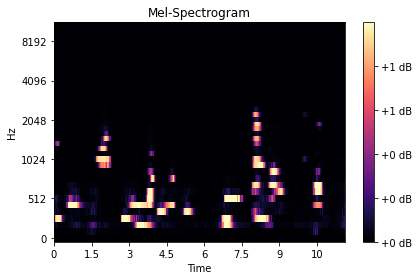

In [65]:
# 복원한 값 시각화
import librosa.display
import matplotlib.pyplot as plt

librosa.display.specshow(ab_y_pred[4], y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel_Spectrogram_pred.png')
plt.show()

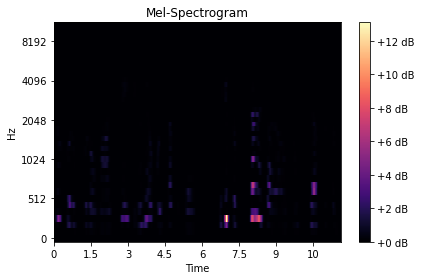

In [66]:
# 원본 값 시각화
librosa.display.specshow(ab_X[4], y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel_Spectrogram_origin.png')
plt.show()

In [35]:
# test 원본 확인
ab_X

array([[[2.25330470e-04, 3.15915066e-04, 3.95387906e-04, ...,
         6.87242602e-04, 7.46971462e-04, 6.97041978e-04],
        [5.45792864e-04, 8.91031814e-04, 1.28533598e-03, ...,
         6.85221106e-02, 4.62301522e-02, 2.76154988e-02],
        [1.56596221e-03, 3.24392109e-03, 5.50096529e-03, ...,
         5.54343872e-02, 3.52523401e-02, 1.99567787e-02],
        ...,
        [9.89753435e-09, 8.75482442e-09, 5.97509109e-09, ...,
         5.60706258e-06, 8.19941215e-06, 9.25353925e-06],
        [9.13261644e-09, 8.07832201e-09, 5.51346435e-09, ...,
         5.30781108e-06, 7.76180605e-06, 8.75967362e-06],
        [8.67685035e-09, 7.67523467e-09, 5.23840082e-09, ...,
         5.12057795e-06, 7.48801040e-06, 8.45068007e-06]],

       [[3.02149943e-04, 2.94181082e-04, 2.31561207e-04, ...,
         1.58856041e-04, 1.25604391e-04, 8.10842321e-05],
        [3.08052474e-03, 3.19701084e-03, 2.67041544e-03, ...,
         5.35359606e-04, 4.27930325e-04, 2.82952969e-04],
        [1.65592309e-03, 

In [92]:
#test X, y_pted 배열 확인
print(ab_X.shape)
print(ab_y_pred.shape)

(6293, 40, 501)
(6293, 40, 501)


In [81]:
#mse 하기 위해 배열 2차원으로 변환
ab_X1 = ab_X.reshape(6293, 20040)
ab_y_pred1 = ab_y_pred.reshape(6293, 20040)

In [88]:
#mean squared error
mse = np.mean(np.power(ab_X1 - ab_y_pred1, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': ab_y})

In [89]:
mse.shape

(6293,)

In [90]:
error_df

,Reconstruction_error,True_class
0,0.391386,0
1,0.221874,0
2,0.403491,0
3,0.360533,0
4,0.126547,0
...,...,...
6288,0.203697,0
6289,0.573454,0
6290,0.227688,0
6291,0.425460,0


In [91]:
# metrics 에서 막힘
from sklearn import metrics
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])
#index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
#threshold_fixed = threshold_rt[index_cnt]
print(precision_rt)
print(recall_rt)
print(threshold_rt)
#print(index_cnt)

[0. 1.]
[nan  0.]
[527.17694923]


C:\Users\evali\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


NameError: name 'threshold_fixed' is not defined

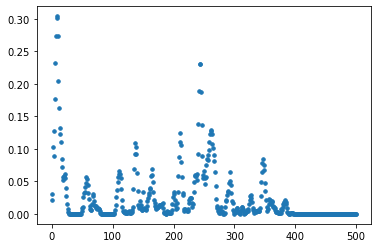

In [53]:
#그래프 그리기
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "phishing" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
print("anomaly detection predicted plot :")
plt.show()

In [70]:
# ???? 이건 뭐죠?
y_pred = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

cf_matrix = metrics.confusion_matrix(error_df['True_class'], y_pred)

NameError: name 'threshold_fixed' is not defined

In [ ]:
# 그래프 그리기
plt.figure(figsize=(7, 7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

In [ ]:
# reshape 실험용 안 쓰일 수 있음
#ab_X = ab_X.reshape(ab_X.shape[0]*ab_X.shape[1],ab_X.shape[2])
#ab_y_pred = ab_y_pred.reshape(ab_y_pred.shape[0]*ab_y_pred.shape[1],ab_y_pred.shape[2])

In [ ]:
#print(ab_X.shape)
#print(ab_y_pred.shape)

In [94]:
# flatten 및 0,1 바이너리로 나누기 이게 맞나 확인용
ab_X = np.array(ab_X).flatten()
ab_X = np.where(ab_X > 0.5, 1,0)
ab_y_pred = np.array(ab_y_pred).flatten()
ab_y_pred = np.where(ab_y_pred > 0.5, 1,0)

In [95]:
# 0,1 바이너리 나눈 것 확인 원본
ab_X

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
np.unique(ab_X)

array([0, 1])

In [97]:
# 0,1 바이너리 나눈 것 확인 pred
ab_y_pred

array([0, 0, 0, ..., 0, 0, 0])

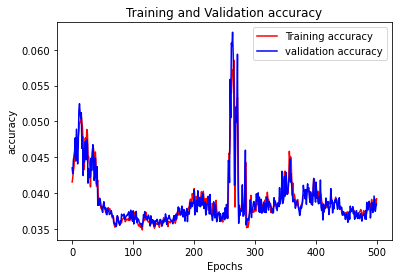

In [98]:
#train & validation accuracy 확인
import matplotlib.pyplot as plt

n_epochs = len(history.history['loss'])
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,n_epochs)
plt.plot(epochs, loss_train, 'r', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy') ## <=loss아니고, accuracy임^^
plt.legend()
plt.show()

In [99]:
#배열 확인
for i in range(len(train_wav)):
    print(len(train_wav['data'][i]))

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
6972
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
15718
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
34248
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
15754
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
62308
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
40238
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
74702
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
75980
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
4926
80000
80000
80000
80000

80000
80000
80000
21874
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
61218
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
17800
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
16906
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
53836
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
21908
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
380
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000


80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
15768
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
39218
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
77098
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
54142
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
77010
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
2502
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000

80000
80000
80000
71912
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
72538
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
48024
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
77658
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
12864
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
4046


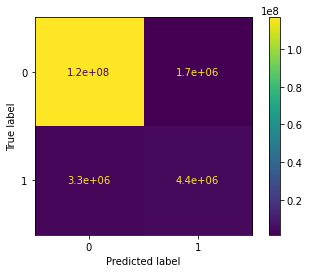

In [104]:
# confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ab_X, ab_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])
cm_display.plot()
plt.show()

In [101]:
#각 스코어 확인
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
print('Acc Score: ',accuracy_score(ab_X,ab_y_pred))
print('Recall Score: ',recall_score(ab_X,ab_y_pred))
print('Pre Score: ',precision_score(ab_X,ab_y_pred))
print('F1 Score: ',f1_score(ab_X,ab_y_pred))

Acc Score:  0.9602587689708776
Recall Score:  0.57100817113834
Pre Score:  0.726564358217651
F1 Score:  0.6394620354764635


In [102]:
# ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ab_X, ab_y_pred)
roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPRate(Recall)': tpr,
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2
1,0.014136,0.571008,1
2,1.000000,1.000000,0


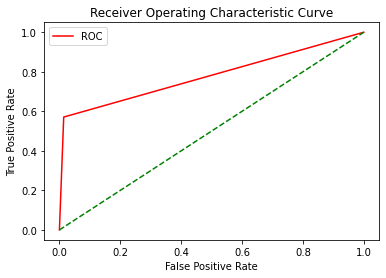

In [103]:
# ROC 커브 확인 커브 된 것 맞음
import matplotlib.pyplot as plt
import seaborn as sns
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [106]:
# flatten 된 배열 다시 -1,1로 바꾸기
ab_X = ab_X.reshape(-1,1)
ab_y_pred = ab_y_pred.reshape(-1,1)

In [ ]:
#아 randomforest 해야했나
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(ab_X, ab_y_pred)
rf.score(ab_X,ab_y_pred)

C:\Users\evali\AppData\Local\Temp\ipykernel_16984\817173717.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(ab_X, ab_y_pred)


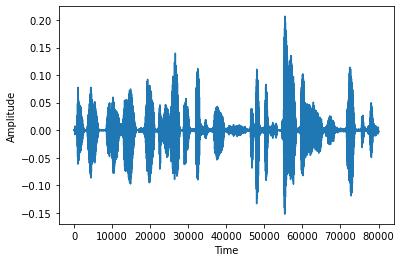

In [67]:
import matplotlib.pyplot as plt
audio = abnomal_wav['data'][4]
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()